In [2]:
import numpy as np
import pandas as pd
import keras
import re
import tensorflow as tf
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from pymystem3 import Mystem
from sklearn.model_selection import train_test_split
stemmer = Mystem()

In [3]:
filename = 'data/lenta-ru-news.csv'


In [4]:
df = pd.read_csv(filename)

/home/timur/.local/share/virtualenvs/kaggle-1wSJiHo3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800975 entries, 0 to 800974
Data columns (total 6 columns):
url      800975 non-null object
title    800975 non-null object
text     800970 non-null object
topic    738973 non-null object
tags     773756 non-null object
date     800975 non-null object
dtypes: object(6)
memory usage: 36.7+ MB


In [6]:
df.columns

Index(['url', 'title', 'text', 'topic', 'tags', 'date'], dtype='object')

In [7]:
len(df.index)

800975

In [8]:
def year_extraction(row):
    return int(row['date'][0:4])

In [9]:
df['year'] = df.apply(lambda row: year_extraction(row), axis=1)


In [10]:
df.columns

Index(['url', 'title', 'text', 'topic', 'tags', 'date', 'year'], dtype='object')

In [11]:
df.head()


,url,title,text,topic,tags,date,year
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16,1914
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16,1914
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17,1914
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17,1914
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18,1914


In [12]:
year_count_summary = df.groupby(['year']).size()
year_count_summary

year
1914        5
1999     3081
2000    16176
2001    21974
2002    22179
2003    21557
2004    24386
2005    30718
2006    35964
2007    36029
2008    50389
2009    51343
2010    44587
2011    44822
2012    46047
2013    43297
2014    38075
2015    44766
2016    63108
2017    58792
2018    43951
2019    59729
dtype: int64

<BarContainer object of 22 artists>

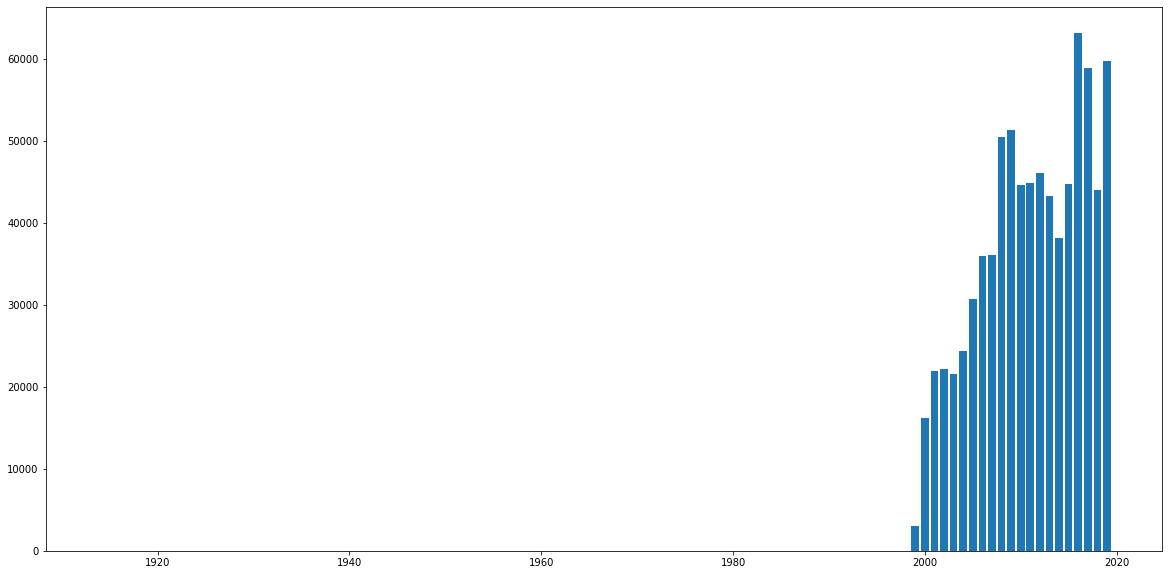

In [13]:
plt.figure(figsize=(20, 10))
plt.bar(year_count_summary.index, year_count_summary)
# новостей больше в определенные года по причинам

In [14]:
def year_condition(row):
    return row['year'] > 1999


In [15]:
df = df[df['year'] > 1999]

In [16]:
tags_count_chart = df[df['tags'] != 'Все'].groupby(['tags']).size()

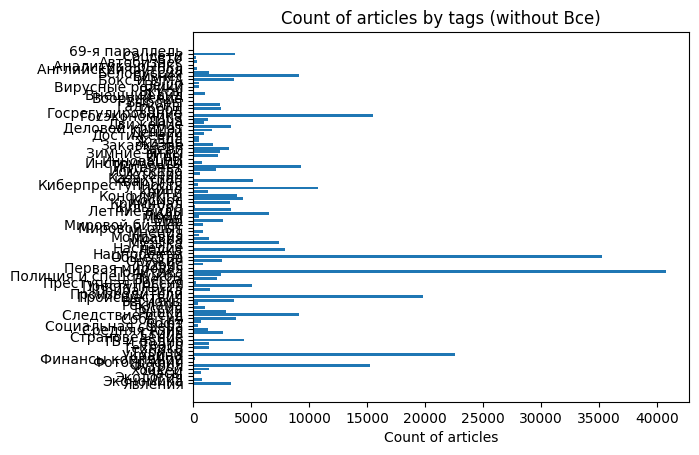

In [17]:
plt.rcdefaults()
fig, ax = plt.subplots()

fig.figsize = (5, 20)
ax.barh(tags_count_chart.index, tags_count_chart, align='center')
ax.set_yticks(tags_count_chart.index)
ax.invert_yaxis()
ax.set_xlabel('Count of articles')
ax.set_title('Count of articles by tags (without Все)')
plt.show()

In [18]:
print('Count of unique tags is: ', len(tags_count_chart.index))

Count of unique tags is:  93


In [19]:
with pd.option_context('display.max_rows', -1, 'display.max_columns', 5):
    print(tags_count_chart)


tags                        1
69-я параллель           3635
Coцсети                   204
Авто                      310
Автобизнес                 28
Аналитика рынка           348
Английский футбол        1344
Белоруссия               9146
Бизнес                   3549
Бокс и ММА                479
Вещи                      514
Вирусные ролики            93
Вкусы                    1047
Внешний вид                 3
Вооружение                 15
Выборы                   2351
Гаджеты                  2380
Город                      41
Госрегулирование        15476
Госэкономика             1296
Дача                      905
Движение                 3254
Деловой климат           1639
Деньги                    909
Достижения                524
Еда                       516
Жизнь                    1724
Закавказье               3063
Звери                    2293
Зимние виды              2094
Игры                        1
Инновации                 742
Инструменты              9319
Интернет 

In [20]:
df[df['tags'] == 'Все'].groupby(['year']).size()
# Категория Все - когда не можем однозначно отнести новость к этому классу.

year
2000    16176
2001    21974
2002    22178
2003    21557
2004    24385
2005    30696
2006    35938
2007    36011
2008    50380
2009    51303
2010    44581
2011    44811
2012    46017
2013     2707
2014      291
2015      183
2016      353
2017      749
2018      229
2019      162
dtype: int64

In [21]:
print('Топики - ', df.groupby('topic').size())

Топики -  topic
69-я параллель         1268
Библиотека               60
Бизнес                 7399
Бывший СССР           53402
Дом                   21734
Из жизни              27605
Интернет и СМИ        44362
Крым                    666
Культпросвет            340
Культура              53797
Легпром                 114
МедНовости                1
Мир                  135829
Наука и техника       53136
Оружие                    3
Путешествия            6408
Россия               158908
Силовые структуры     19596
Сочи                      1
Спорт                 64413
Ценности               7766
ЧМ-2014                   2
Экономика             79077
dtype: int64


In [22]:
df[df['topic'] == 'Крым'].groupby(['year']).size()
# новости про крым в определенные года.

year
2016      5
2017    573
2018     88
dtype: int64

In [23]:
import pickle
with open('data/saved_dataframe.dump', 'wb') as file:
    pickle.dump(df, file)


In [24]:
df.columns


Index(['url', 'title', 'text', 'topic', 'tags', 'date', 'year'], dtype='object')

In [36]:
print(df.text.str.len().mean())
print(df.text.str.len().median())
print(df.text.str.len().max())

1332.2400424121802
1254.0
55387.0


In [37]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 1254
# This is fixed.
EMBEDDING_DIM = 100

In [109]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[0-9a-z#+_]')
STOPWORDS = set(stopwords.words('russian'))

stemmer = Mystem()

def clean_text(text):
    try: 
        text = text.lower() # lowercase text
    except: 
        text = str(text).lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = text.replace('x', '')
    text = " ".join(stemmer.lemmatize(word)[0] for word in text.split() if word not in STOPWORDS)
    return text

In [ ]:
stemmer = Mystem()
def read_text_dataframe_generator():
    x = []
    for row in df['text']:
        x.append(clean_text(row))
    return x

X = read_text_dataframe_generator()

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [ ]:
tokenizer.fit_on_texts(X)

In [ ]:
with open('data/tokenizer_lenta.dump', 'wb') as file:
    pickle.dump(tokenizer, file)